## Task 1 [10 marks]

Update the Gradient Descent (GD) code to predict disease progression (DP) based on two different features: body mass index (BMI) and average blood pressure (BP). Follow the same procedure as before to determine the optimal weights for each case.

Execute the modified code to generate the following outcomes:

- Plot illustrating the actual data points and the predicted regression line for disease progression vs BMI according to the final weights obtained.
- Plot illustrating the actual data points and the predicted regression line for disease progression vs average blood pressure (BP) according to the final weights obtained.
- Display the final weights and cost (MSE) obtained after the optimisation process for both cases (keep the values to be used in the same table of tasks 2 and 3).

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

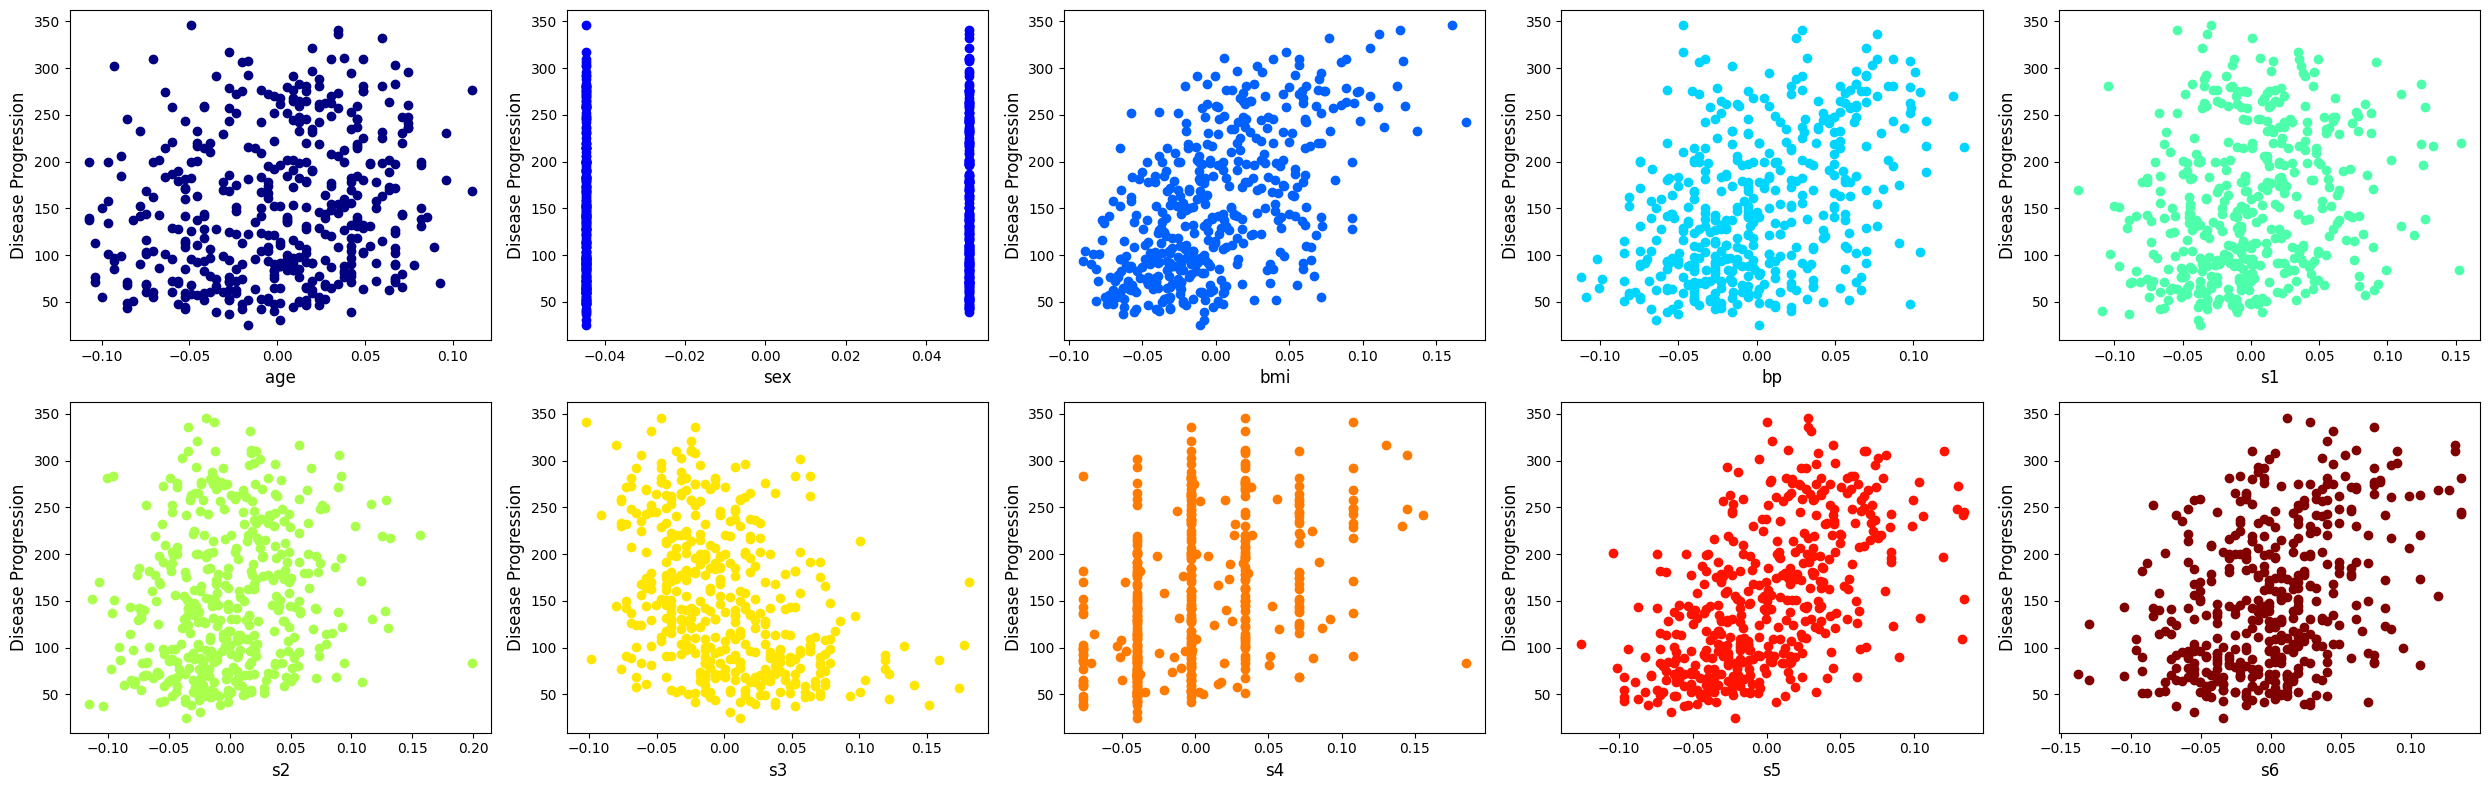

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes = load_diabetes()

# Print data description
print(diabetes['DESCR'])
# Create a DataFrame to store the data and target
diabetes_data = pd.DataFrame(data=diabetes['data'], columns=diabetes['feature_names'])
diabetes_data["DP"] = diabetes['target']

# Set the size of each individual plot
plot_width = 5
plot_height = 4

# Calculate the number of rows and columns for the grid layout
num_features = len(diabetes.feature_names)
num_cols = 5
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(plot_width * num_cols, plot_height * num_rows))

# Flatten the axes array to iterate over all the subplots
axes = axes.flatten()

# Define a colormap for assigning different colors to each feature plot
colors = plt.cm.jet(np.linspace(0, 1, num_features))

# Plot each feature against the target variable in separate subplots
for index, feature_name in enumerate(diabetes.feature_names):
    axes[index].scatter(diabetes.data[:, index], diabetes.target, color=colors[index])
    axes[index].set_ylabel('Disease Progression', size=12)
    axes[index].set_xlabel(feature_name, size=12)

# Hide any remaining empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Iteration: 0, Cost = 6153.033958469029, Weights = [136.92013575   1.93323922]


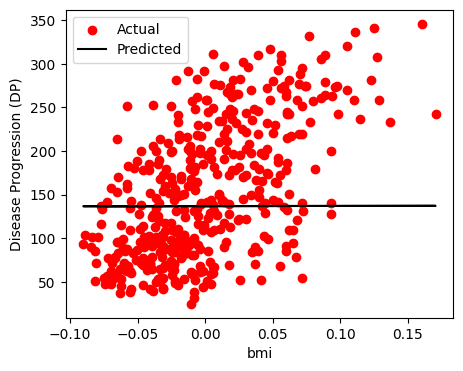

Iteration: 1000, Cost = 3924.9165542211103, Weights = [152.13348416 826.02008226]


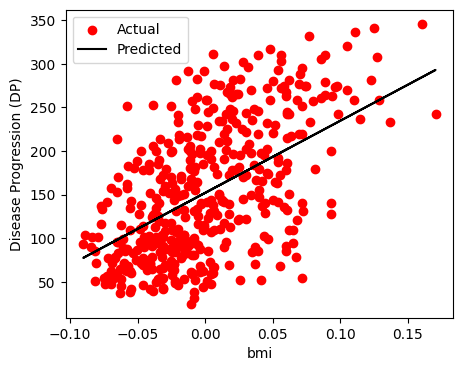

Iteration: 2000, Cost = 3891.041229785707, Weights = [152.13348416 933.36003748]


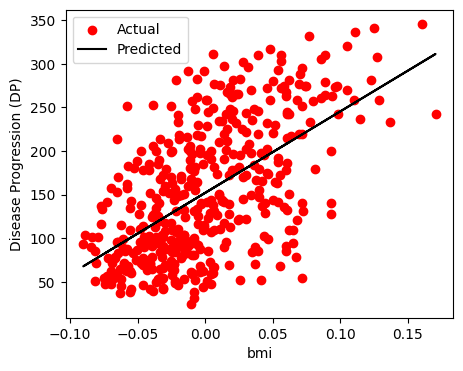

Iteration: 3000, Cost = 3890.466504477406, Weights = [152.13348416 947.34141103]


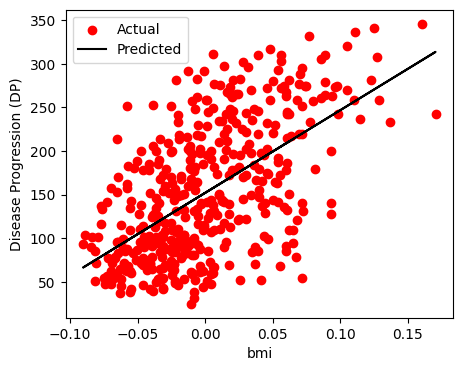

Iteration: 4000, Cost = 3890.4567537462904, Weights = [152.13348416 949.16252979]


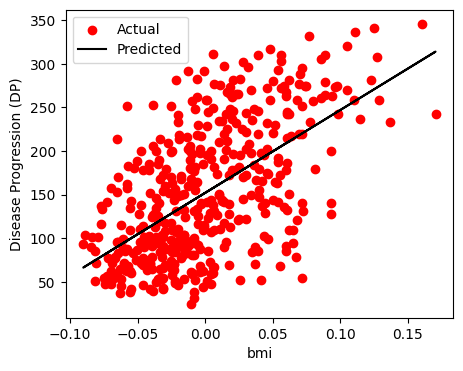

Iteration: 5000, Cost = 3890.456588316379, Weights = [152.13348416 949.39973635]


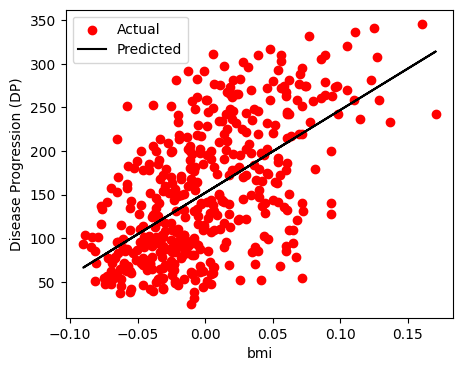

Iteration: 6000, Cost = 3890.4565855097117, Weights = [152.13348416 949.43063326]


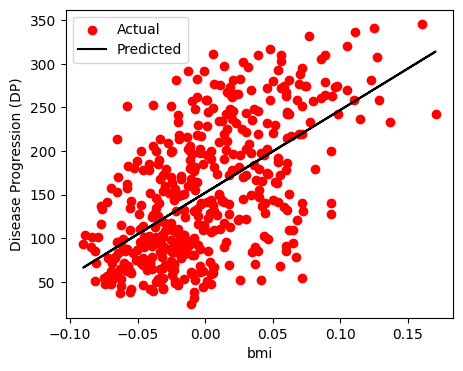

Iteration: 7000, Cost = 3890.4565854620946, Weights = [152.13348416 949.43465769]


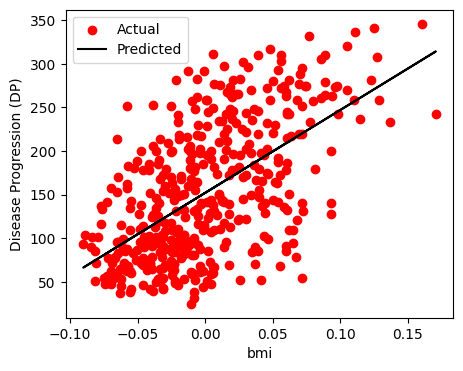

Iteration: 8000, Cost = 3890.4565854612865, Weights = [152.13348416 949.43518188]


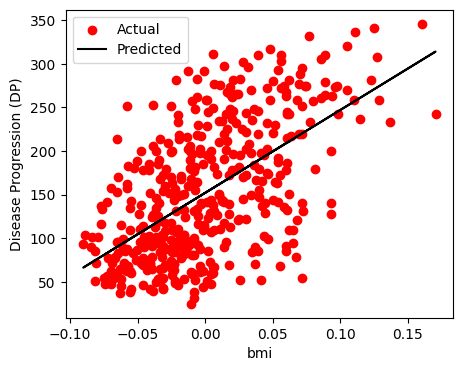

Iteration: 9000, Cost = 3890.456585461273, Weights = [152.13348416 949.43525016]


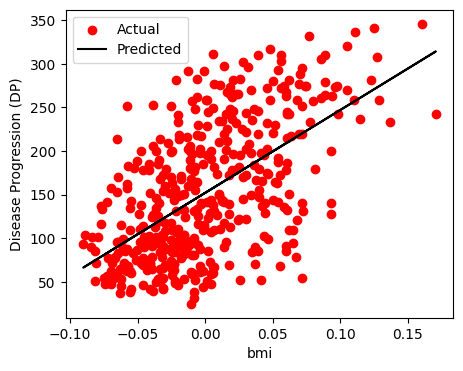

Iteration: 10000, Cost = 3890.456585461273, Weights = [152.13348416 949.43525905]


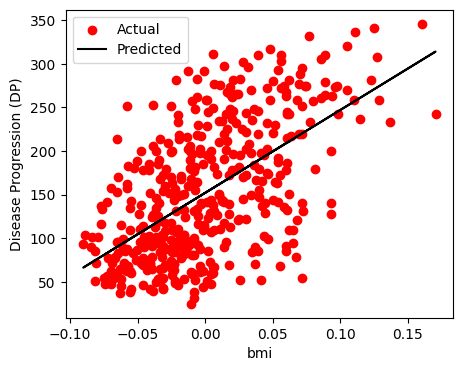

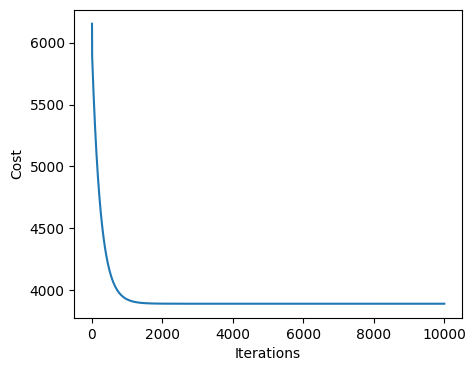

In [6]:
def predict_dp(X,W):
    return np.dot(X,W)
    
def cost(X,W,Y):
    prediction = predict_dp(X,W)
    return ((Y - prediction)**2).mean()

def plot_line(X,W,Y,typ):
    """Plot a line from slope and intercept"""
    y_vals = predict_dp(X,W)
    plt.figure(figsize=(5, 4))
    plt.xlabel(typ)
    plt.ylabel('Disease Progression (DP)')
    plt.scatter(X[:,1],Y, color='red', label='Actual')
    plt.plot(X[:,1], y_vals, color='black', label='Predicted')
    plt.legend(loc='upper left')
    plt.show()

def plot_cost(cost):
    plt.figure(figsize=(5, 4))
    plt.plot(range(1, len(cost) + 1), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

def fit(n_iter,X,Y,lr,typ):
    W0 = []
    W1 = []
    costs = []
    # Incorporate the bias term
    X = np.column_stack((np.ones(len(X)),X))
    #N = len(diabetes['target'])
    W = np.zeros(2)
    c = 0
    for i in range(n_iter):
        pred = predict_dp(X,W)
        W[0] += lr *(Y - pred).mean()
        W[1] += lr *((Y - pred)* X[:,1]).mean()
        W = np.array([W[0],W[1]])
        J = cost(X,W,Y)
        W0.append(W[0])
        W1.append(W[1])
        costs.append(J)
        c = i + 1
        if i%1000==0:
            print(f"Iteration: {i}, Cost = {J}, Weights = {W}")
            plot_line(X,W,Y,typ)
    print(f"Iteration: {c}, Cost = {J}, Weights = {W}")
    plot_line(X,W,Y,typ)
    plot_cost(costs)

lr = 0.9
n_iter=10000
data_type = "bmi"
X = diabetes_data[data_type]
Y = diabetes_data["DP"]
fit(n_iter,X,Y,lr,data_type)

Iteration: 0, Cost = 6156.628899189452, Weights = [136.92013575   1.4553494 ]


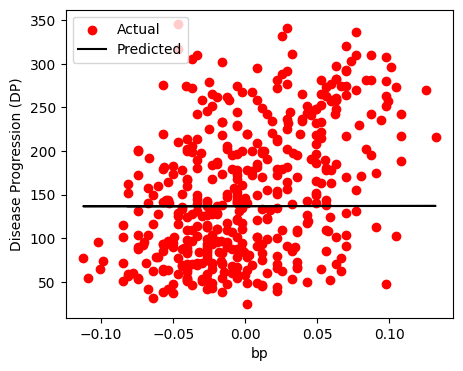

Iteration: 1000, Cost = 4793.642822381146, Weights = [152.13348416 621.83087203]


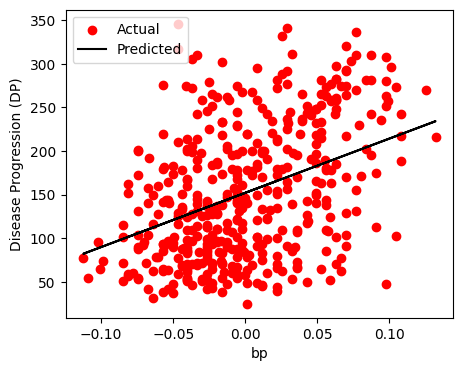

Iteration: 2000, Cost = 4774.44522803898, Weights = [152.13348416 702.6367742 ]


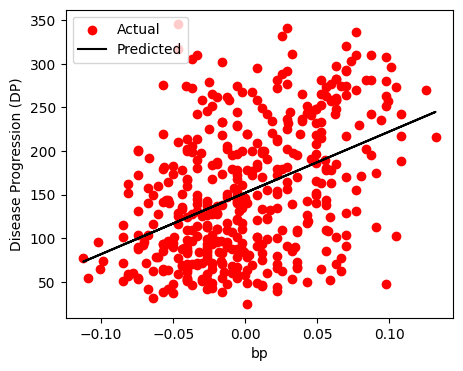

Iteration: 3000, Cost = 4774.119523606304, Weights = [152.13348416 713.16200221]


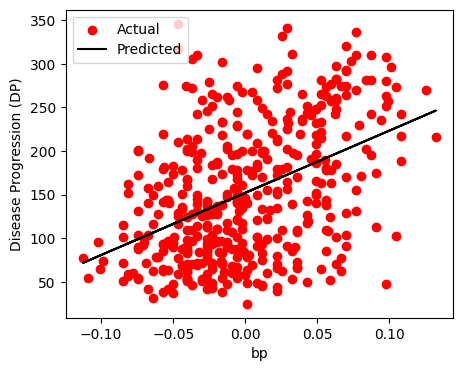

Iteration: 4000, Cost = 4774.113997738033, Weights = [152.13348416 714.53294693]


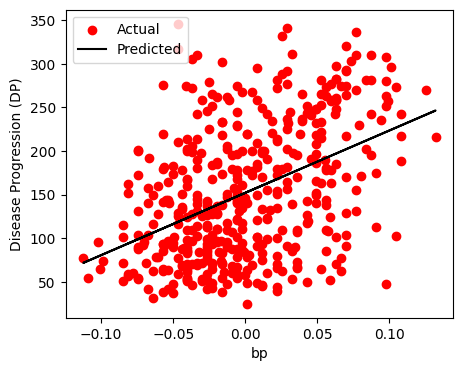

Iteration: 5000, Cost = 4774.113903986714, Weights = [152.13348416 714.71151688]


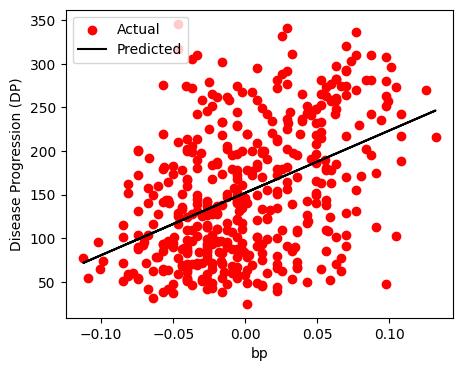

Iteration: 6000, Cost = 4774.113902396139, Weights = [152.13348416 714.73477618]


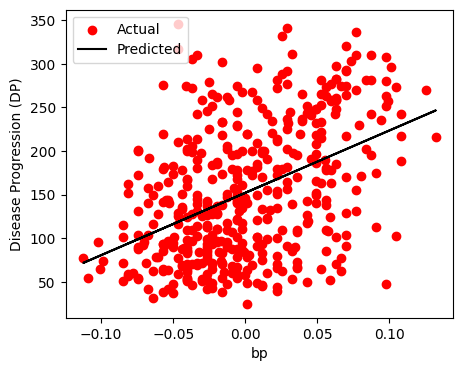

Iteration: 7000, Cost = 4774.113902369153, Weights = [152.13348416 714.73780578]


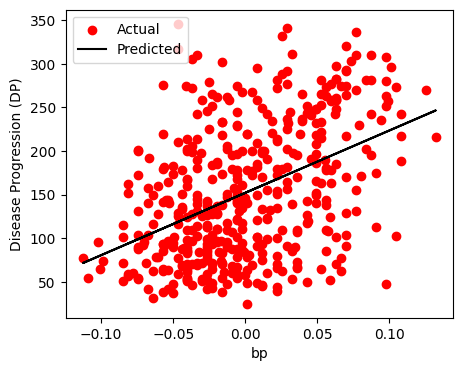

Iteration: 8000, Cost = 4774.113902368695, Weights = [152.13348416 714.7382004 ]


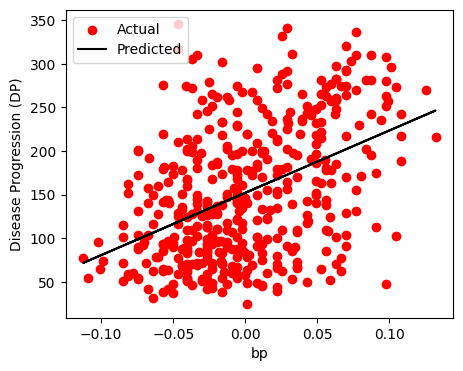

Iteration: 9000, Cost = 4774.113902368687, Weights = [152.13348416 714.7382518 ]


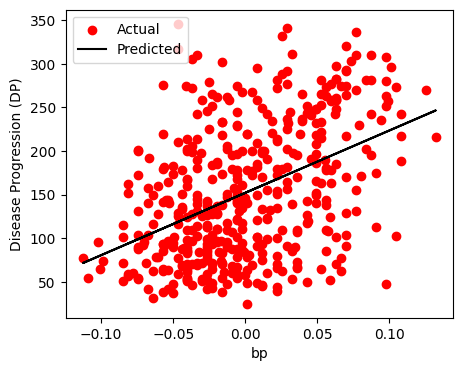

Iteration: 10000, Cost = 4774.113902368687, Weights = [152.13348416 714.73825849]


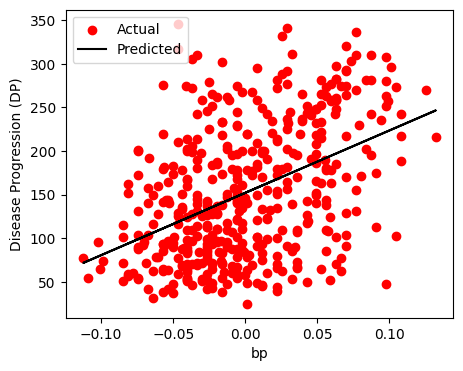

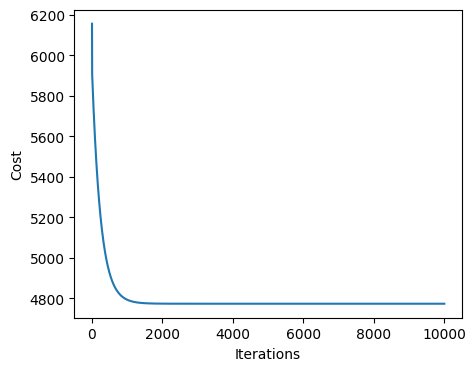

In [7]:
lr = 0.9
n_iter=10000
data_type = "bp"
X = diabetes_data[data_type]
Y = diabetes_data["DP"]
fit(n_iter,X,Y,lr,data_type)